In [1]:
# Importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargarmos el dataset
df_car = pd.read_csv('/home/antonio/Documentos/arboles/datasets/car_evaluation.csv', header=None)
df_car.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [3]:
df_car.shape

(1728, 7)

In [4]:
# Renombrar las Columnas
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [6]:
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [7]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
# Dividimos en 'X' y 'y'
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [10]:
from sklearn.model_selection import train_test_split

# Dividimos 70 y 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [12]:
y_train.shape, y_test.shape

((1209,), (519,))

In [13]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [14]:
# Debemos transformar nuestras a numéricas
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [15]:
# Verificamos la transformación
X_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3
888,1,3,4,2,1,2
1001,1,2,2,3,2,1
327,4,4,4,3,3,2
879,1,3,4,1,1,2
1217,1,4,2,3,2,1


In [16]:
# Importamos el arbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

# Entrenamiento del modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [17]:
# Calculo de predicción en train y en test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [18]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [19]:
# Calculo de métricas
from sklearn.metrics import accuracy_score

# Accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Accuracy en Train: ', train_accuracy_tree)
print('Accuracy en Test: ', test_accuracy_tree)

Accuracy en Train:  0.7733664185277088
Accuracy en Test:  0.7591522157996147


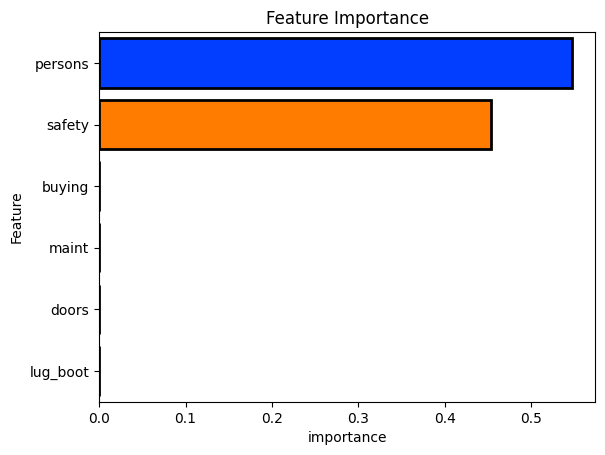

In [20]:
# verificamos en feature importance
importance = tree.feature_importances_
columns = X.columns

importance_df = pd.DataFrame({
    'Feature': columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)

sns.barplot(data=importance_df, x='importance', y='Feature', hue='Feature', palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Feature Importance')
plt.show()

In [21]:
# Entrenamiento del modelo con Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 10, random_state=0)

# Entrenamos el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [22]:
# Calculo de las predicciones en train y test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [23]:
# Evaluación del modelo de clasificación

# Cálculo del accuracy en train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Cálculo del accuracy en test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('el accuracy en train es: ', train_accuracy_rf)
print('el accuracy en test es: ', test_accuracy_rf)

el accuracy en train es:  0.9942100909842845
el accuracy en test es:  0.8863198458574181


In [24]:
# Visualización de las features importance
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

Text(0.5, 1.0, 'Visualizando Feature Importance')

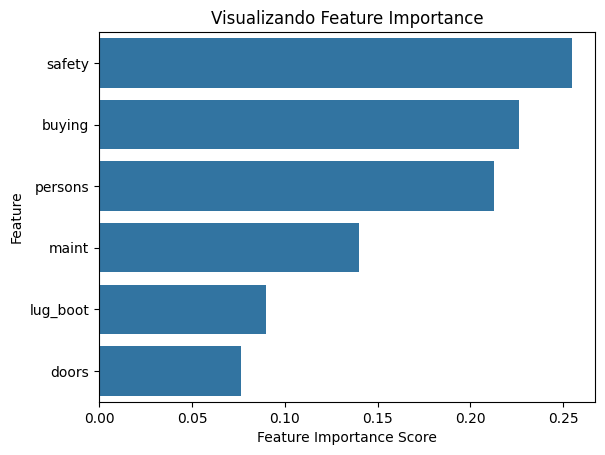

In [25]:
# Grafico de barras
sns.barplot(x=feature_scores, y = feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualizando Feature Importance')


In [28]:
# Matriz de confusion del  RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)
print('Matriz de ocnfusion\n\n', cm)

Matriz de ocnfusion

 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [29]:
# RF
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

